## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn. impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
music_df = pd.read_csv('music_clean.csv')
music_df.drop('Unnamed: 0', axis = 'columns', inplace = True)
music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


## We want to evaluate some classification models for this dataset

-- KNN

-- Logistic Regression

-- DecisionTree Classifier

We will evaluate each one of this classifiers for our dataset to predict the genre of the music.

## EDA

Are there any missing values?

In [3]:
music_df.isna().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64

Le's check if our variables need to standardized or not.

Usually I check min, max and mean to verify if the explanatory variables are in the same order of magnitude.

In [4]:
music_df.describe().agg(['min','max','mean'])

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
min,0.000000,0.000003,0.062400,-1.000000e+00,0.002510,0.000000,0.025400,-38.718000,0.023400,28.942130,0.029800,0.000000
max,1000.000000,1000.000000,1000.000000,1.617333e+06,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,163.429823,125.264740,125.420603,3.263212e+05,125.482064,125.180095,125.235135,116.961996,125.131547,221.239155,125.393714,125.437531


Analyzing this three statistics we conclude they are all in the same order of magnitude with the exception of duration_ms.

So we will Standardize(scaling) with StandardScaler from sklearn.

In [5]:
#First we will divide our data in features and labels
X = music_df.drop('genre', axis = 'columns').values
y = music_df.genre.values
np.mean(X)

19762.413275219726

In [6]:
#Divide the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#Intitate Standard Scaler
scaler = StandardScaler()

#Fit & Transform Xtrain
X_train_scaled = scaler.fit_transform(X_train)

#Fit X_test
X_test_scaled = scaler.transform(X_test)

#Let's verify that the scaling occur
print(f'The initial dataset X has a mean of {np.mean(X)} with standardization has {np.mean(X_train_scaled)}')
print(f'The initial dataset X has a standard deviation of {np.std(X)} with standardization has {np.std(X_train_scaled)}')

The initial dataset X has a mean of 19762.413275219726 with standardization has 4.037174635000569e-16
The initial dataset X has a standard deviation of 71791.8429618064 with standardization has 0.9999999999999993


In [7]:
X_train_scaled

array([[ 2.35021073e-01, -7.61554579e-01, -2.59987728e-02, ...,
        -5.58946758e-01, -1.11821899e+00,  6.70889094e-01],
       [-2.78014046e+00, -6.65859821e-01, -1.46312158e-01, ...,
        -5.06200787e-01, -9.68503215e-05,  5.27693780e-02],
       [-1.55971793e+00,  2.31994725e+00, -7.35214520e-01, ...,
        -3.38789663e-01,  1.80116970e-01, -9.24265284e-02],
       ...,
       [-1.48792837e+00,  1.55569561e+00,  1.19643747e-01, ...,
        -6.02519516e-01, -1.55735533e+00, -1.04657106e+00],
       [ 1.96523921e-02, -8.57712133e-01, -1.00750271e+00, ...,
        -1.74818493e-01,  1.97989228e+00,  1.14381290e+00],
       [ 1.02470624e+00, -7.80170965e-01,  5.31242171e-01, ...,
        -5.08494090e-01,  1.98541183e-02,  2.01913680e+00]])

## Evaluation of Classification Models

We will evaluate the classification and after we will build a small pipeline to run the best classification model.

In [8]:
#Enumerate the models that we want to evaluate
models = {'Logistic Regression' : LogisticRegression(), 'KNN' : KNeighborsClassifier(),
            'Decision Tree Classifier' : DecisionTreeClassifier()}

#Initiate a list to append results
model_results = []

#Start a looping through the models that we want to evaluate
for model in models.values():
     
    #We will evaluate each model in 6 folds with shuffle after each fold to prevent eventula Bias during the evaluation
    kf = KFold(n_splits = 6, random_state = 12, shuffle = True)
    
    #We will apply cross validation now for each of the folds generate above
    cv = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    
    # #Append the results to the model list
    model_results.append(cv)

Now let's evaluate the classification models calculating the accuracy of each model.

In [9]:
print(f"Logistic Regression has a {np.round(np.mean(model_results[0]),4)} accuracy with a standard deviation of {np.round(np.std(model_results[0]),4)}")

print(f"KNN has a {np.round(np.mean(model_results[1]),4)} accuracy with a standard deviation of {np.round(np.std(model_results[1]),4)}")

print(f"Decision Tree Classifier has a {np.round(np.mean(model_results[2]),4)} accuracy with a standard deviation of {np.round(np.std(model_results[2]),4)}")

Logistic Regression has a 0.8699 accuracy with a standard deviation of 0.0332
KNN has a 0.8087 accuracy with a standard deviation of 0.032
Decision Tree Classifier has a 0.8175 accuracy with a standard deviation of 0.0152


Logistic Regression was clearly the best model with a 87% of accuracy, with a medium standard deviation.

To finish let's plot cv scores in boxplots.

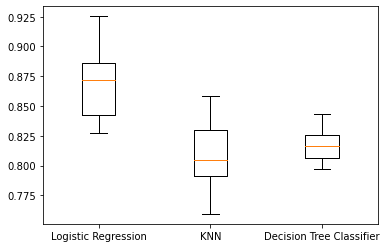

In [10]:
plt.boxplot(model_results, labels = models.keys())
plt.show()

## Logistic Regression Model

With Logistic Regression we will build a Pipeline to decide the following features,

-- Solver: ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ 

-- Hyperparameter: 0.001 to 1.0

Pipeline will have the following steps,

-- SimpleImputer (to replace eventual nan values for the mean)

-- Standardization

-- Logistic Regression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

#PipeLine Steps
pipeline_steps = [('impute_mean_nan', SimpleImputer()),
                  ('scaler', StandardScaler()),
                  ('logreg', LogisticRegression())]

#Initalize Pipeline
pipeline = Pipeline(pipeline_steps)

#Dict with the parameters that you want to test in logistic Regression
parameters_eval = {'logreg__solver': ['lbfgs', 'sag', 'saga','newton-cg'],
                   'logreg__C': np.linspace(0.001,1.0,10)}

#Intialize GridSearch into this (This will run 4 * 10 times, 40 in total) to find the best combination for our model
tuning_params = GridSearchCV(pipeline, param_grid = parameters_eval)

#Fit the train dataset
tuning_params.fit(X_train, y_train)

#Predict the label
y_pred = tuning_params.predict(X_test)

In [12]:
print(f"Tuned Logistic Regression Parameters {tuning_params.best_params_} and Accuracy of {tuning_params.score(X_test, y_test)}")

Tuned Logistic Regression Parameters {'logreg__C': 0.445, 'logreg__solver': 'lbfgs'} and Accuracy of 0.8


## Conclusion

The best model to predict music genre is Logistic regression with the solver 'lbfgs' and hyperparameter C of 0.445 that presented an accuracy of 80%.